In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

#Turn off warning
pd.set_option('mode.chained_assignment', None)

# Import our input dataset
soup_org_df = pd.read_csv('charity_data.csv')
soup_org_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Find the Unique values each column
soup_org_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
#Drop these columns becuase It won't need to do analysis
#EIN Identification columns
#STATUS—Active status 
soup_df = soup_org_df.drop(columns=["EIN","STATUS"])

In [4]:
# Find if any column has NA values
soup_df.count()

NAME                      34299
APPLICATION_TYPE          34299
AFFILIATION               34299
CLASSIFICATION            34299
USE_CASE                  34299
ORGANIZATION              34299
INCOME_AMT                34299
SPECIAL_CONSIDERATIONS    34299
ASK_AMT                   34299
IS_SUCCESSFUL             34299
dtype: int64

In [5]:
# Get the select dataframe with all columns in Catergories (Object Type)
soup_obj_df = soup_df.select_dtypes('object')
soup_obj_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,N
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,0,N
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,0,N


In [6]:
# View categories with unique values
def viewValueCounts(dataframe, column_name):
    # View the count value for each classification
    value_counts  = dataframe[column_name].value_counts()
    print(value_counts)
    # View the density of classification
    value_counts.plot.density()

In [7]:
# Bucketing all categories that is rare or infrequency in one category
def bucketValues(dataframe, column_name, category_name, upper_count_infrequency):
    #view unique value and count
    value_counts  = dataframe[column_name].value_counts()
    #get all unique labels
    index_lessthan = list(value_counts[value_counts < upper_count_infrequency].index)
    #replace with new category label
    dataframe[column_name] = dataframe[column_name].apply(lambda x: category_name if x in index_lessthan else x)
    return dataframe

In [8]:
# Find the unique value of each columns
soup_obj_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C6100        1
C2150        1
C2561        1
C5200        1
Name: CLASSIFICATION, Length: 71, dtype: int64


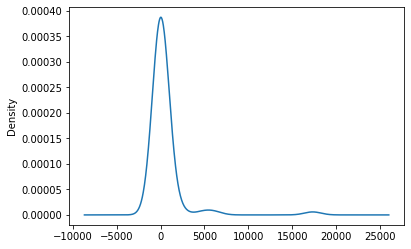

In [9]:
#View ValueCounts of CLASSIFICATION
viewValueCounts(soup_obj_df, 'CLASSIFICATION')

In [10]:
# Classification less than 2
# Group value count 1 together
soup_obj_df = bucketValues(soup_obj_df,'CLASSIFICATION','C-OTHER',2)
soup_obj_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               46
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
                                                    ... 
ORANGECREST GIRLS AMATUER SOFTBALLASSOCIATION          1
KANSAS NATURAL RESOURCE COUNCIL INC                    1
TEXAS VOLUNTARY ORGANIZATIONS ACTIVE IN DISASTER       1
LEO & GLADYS DOLECHEK CHARITABLE TR                    1
KEEP DOUGLASVILLE BEAUTIFUL INC                        1
Name: NAME, Length: 19568, dtype: int64


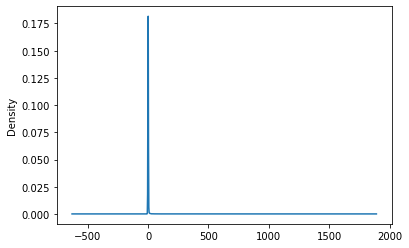

In [11]:
#View ValueCounts of CLASSIFICATION
viewValueCounts(soup_obj_df, 'NAME')

In [12]:
# Classification less than 1000
# Group value count 1 together
soup_obj_df = bucketValues(soup_obj_df,'NAME','N-OTHER',2)
soup_obj_df.nunique()

NAME                      793
APPLICATION_TYPE           17
AFFILIATION                 6
CLASSIFICATION             46
USE_CASE                    5
ORGANIZATION                4
INCOME_AMT                  9
SPECIAL_CONSIDERATIONS      2
dtype: int64

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(soup_obj_df[soup_obj_df.columns]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(soup_obj_df.columns)
encode_df.head()

#soup_obj_df = pd.get_dummies(soup_obj_df)
#soup_obj_df.head()

,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AGENTS ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
soup_nonobj_df = soup_df.select_dtypes(exclude='object')
soup_nonobj_df

,ASK_AMT,IS_SUCCESSFUL
0,5000,1
1,108590,1
2,5000,0
3,6692,1
4,142590,1
...,...,...
34294,5000,0
34295,5000,0
34296,5000,0
34297,5000,1


In [15]:
soup_nonobj_df.nunique()

ASK_AMT          8747
IS_SUCCESSFUL       2
dtype: int64

In [16]:
# Let the value and count of ASK AMT
soup_nonobj_df["ASK_AMT"].value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [17]:
# View the statistis of ASK_AMT
soup_nonobj_df["ASK_AMT"].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

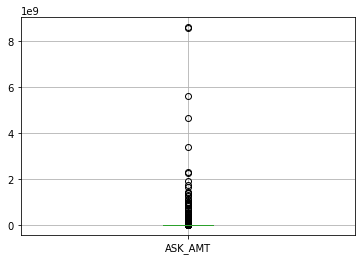

In [18]:
# The money to ask with a large amount can be a noise
soup_nonobj_df.boxplot(column=["ASK_AMT"])

In [19]:
# $5000 or Other
def ASK_AMT_Class(x):
    if x <= 5000:
        return 0
    else:
        return 1
    
# Bucket in ask amt class    
soup_nonobj_df["ASK_AMT_Class"] = soup_nonobj_df["ASK_AMT"].apply(ASK_AMT_Class)


In [20]:
soup_nonobj_df.drop(columns=["ASK_AMT"],inplace=True)
soup_nonobj_df

,IS_SUCCESSFUL,ASK_AMT_Class
0,1,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
34294,0,0
34295,0,0
34296,0,0
34297,1,0


In [21]:
#Merge dataset
soup_df = soup_nonobj_df.merge(encode_df,how="inner", right_index=True, left_index=True)
soup_df

,IS_SUCCESSFUL,ASK_AMT_Class,NAME_4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS,NAME_AACE INTERNATIONAL,NAME_ACADEMY OF GENERAL DENTISTRY,NAME_ACADEMY OF MANAGED CARE PHARMACY,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTIVE 20-30 UNITED STATES AND CANADA,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# IS_SUCCESSFUL—Was the money used effectively ---> TARGET
# Split our preprocessed data into our features and target arrays
y = soup_df["IS_SUCCESSFUL"].values
X = soup_df.drop(columns =["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

In [23]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features//2
hidden_nodes_layer2 = number_input_features//4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 441)               389844    
_________________________________________________________________
dense_1 (Dense)              (None, 220)               97240     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 221       
Total params: 487,305
Trainable params: 487,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 3s 129us/sample - loss: 0.4655 - accuracy: 0.7764
Epoch 2/50
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4196 - accuracy: 0.8022
Epoch 3/50
25724/25724 [==============================] - 4s 156us/sample - loss: 0.4107 - accuracy: 0.8063
Epoch 4/50
25724/25724 [==============================] - 3s 122us/sample - loss: 0.4046 - accuracy: 0.8067
Epoch 5/50
25724/25724 [==============================] - 3s 102us/sample - loss: 0.4020 - accuracy: 0.8091
Epoch 6/50
25724/25724 [==============================] - 3s 107us/sample - loss: 0.3994 - accuracy: 0.8103
Epoch 7/50
25724/25724 [==============================] - 3s 106us/sample - loss: 0.3969 - accuracy: 0.8113
Epoch 8/50
25724/25724 [==============================] - 4s 138us/sample - loss: 0.3944 - accuracy: 0.8120
Epoch 9/50
25724/25724 [==============================] - 3s 111us/sample - loss: 0.3924 - accuracy: 0.8136
Epoch

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 1s - loss: 76.0066 - accuracy: 0.7931
Loss: 76.00658843941314, Accuracy: 0.7931195497512817
